# 第2章 感知机

二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

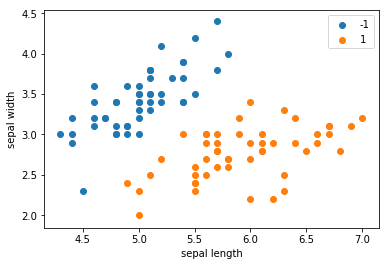

In [5]:
# plot dataset
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='-1')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [0]:
# 将df前100行的第一二及最后一列作为数据集
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

## Perceptron

In [0]:
# 原始形式 2.1
class PLA:
    def __init__(self, max_iter=1000, shuffle=False):
        self.b = 0
        self.lr = 0.1
        self.max_iter = max_iter
        self.iter = 0
        self.shuffle = shuffle
        
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def fit(self, X, y):
        N, M = X.shape
        self.w = np.ones(M)
        for n in range(self.max_iter):
            self.iter = n
            wrong_items = 0
            if self.shuffle: #每次迭代，是否打乱
                idx = np.random.permutation(range(N))
                X,y = X[idx],y[idx]
            for i in range(N):
                if y[i] * self.sign(X[i], self.w, self.b) <= 0:
                    self.w += self.lr * np.dot(y[i], X[i])
                    self.b += self.lr * y[i]
                    wrong_items += 1
            if wrong_items == 0:
                print("finished at iters: {}, w: {}, b: {}".format(self.iter, self.w, self.b))
                return 
        print("finished for reaching the max_iter: {}, w: {}, b: {}".format(self.max_iter, self.w, self.b))

In [0]:
# 对偶形式 2.3
class PLA_dual:
    def __init__(self, max_iter=1000):
        self.b = 0
        self.lr = 0.1
        self.max_iter = max_iter
        self.iter = 0
    
    def cal_w(self, X):
        w = 0
        for i in range(len(self.alpha)):
            w += self.alpha[i]*y[i]*X[i]
        return w
    
    def gram_matrix(self, X):
        return np.dot(X, X.T)
    
    def fit(self, X, y):
        N, M = X.shape
        self.alpha = np.zeros(N)
        gram = self.gram_matrix(X)
        for n in range(self.max_iter):
            self.iter = n
            wrong_items = 0
            for i in range(N):
                tmp = 0
                for j in range(N):
                    tmp += self.alpha[j] * y[j] * gram[i,j]
                tmp += self.b
                if y[i] * tmp <= 0:
                    self.alpha[i] += self.lr
                    self.b += self.lr * y[i]
                    wrong_items += 1
            if wrong_items == 0:
                self.w = self.cal_w(X)
                print("finished at iters: {}, w: {}, b: {}".format(self.iter, self.w, self.b))
                return
        self.w = self.cal_w(X)
        print("finished for reaching the max_iter: {}, w: {}, b: {}".format(self.max_iter, self.w, self.b))
        return

In [11]:
perceptron1 = PLA()
perceptron1.fit(X, y)

finished at iters: 678, w: [  7.8 -10. ], b: -12.099999999999973


In [12]:
perceptron2 = PLA(shuffle=True)
perceptron2.fit(X, y)

finished at iters: 474, w: [ 6.87 -8.71], b: -10.899999999999977


In [13]:
perceptron3 = PLA_dual()
perceptron3.fit(X, y)

finished at iters: 691, w: [  7.88 -10.07], b: -12.299999999999972


In [0]:
def plot(model, tilte):
    x_points = np.linspace(4, 7, 10)
    y_ = -(model.w[0]*x_points + model.b)/model.w[1]
    plt.plot(x_points, y_)
    print(y_)

    plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='-1')
    plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title(tilte)
    plt.legend()

[1.91 2.17 2.43 2.69 2.95 3.21 3.47 3.73 3.99 4.25]


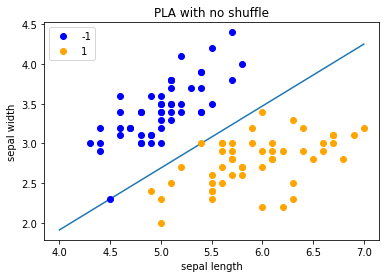

In [15]:
plot(perceptron1, 'PLA with no shuffle')

[1.90355913 2.16647532 2.4293915  2.69230769 2.95522388 3.21814007
 3.48105626 3.74397245 4.00688863 4.26980482]


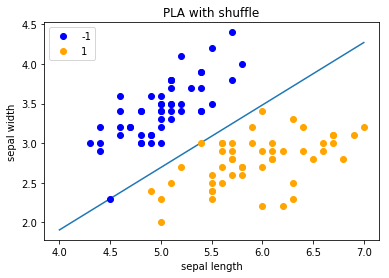

In [16]:
plot(perceptron2, 'PLA with shuffle')

[1.90863952 2.1694803  2.43032109 2.69116187 2.95200265 3.21284343
 3.47368421 3.73452499 3.99536577 4.25620655]


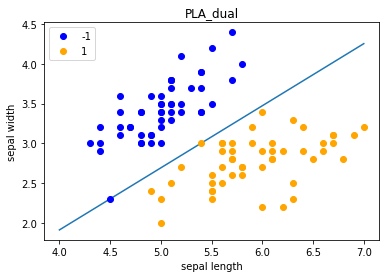

In [17]:
plot(perceptron3, 'PLA_dual')

In [0]:
# w有细微差别，plot出来的分界面差不多。

## scikit-learn Perceptron

In [0]:
from sklearn.linear_model import Perceptron

In [20]:
clf = Perceptron()
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# Weights assigned to the features.
clf.coef_

array([[ 23.2, -38.7]])

In [22]:
# 截距 Constants in decision function.
clf.intercept_

array([-5.])

In [23]:
clf.n_iter_

8

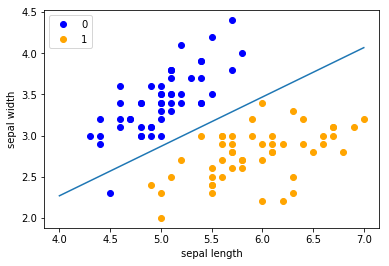

In [24]:
x_ponits = np.linspace(4, 7, 10)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [0]:
#感知机的假设空间是定义在特征空间中的所以线性分类器的集合。
#感知机的模型复杂度体现在计算w和x的内积上，样本数目和特征空间维数是决定模型复杂度的关键。

作业

In [0]:
mydata = np.array([[3,3, 1],[4,3, 1],[1,1, -1]])
X = mydata[:,:-1]
y = mydata[:,-1]

In [0]:
def plot1(model):
    x_ponits = np.linspace(0, 7, 10)
    y_ = -(model.w[0]*x_ponits + model.b)/(model.w[1] + 1e-10)
    plt.plot(x_ponits, y_)

    plt.plot(mydata[:2, 0], mydata[:2, 1], 'bo', color='blue', label='+1')
    plt.plot(mydata[2:, 0], mydata[2:, 1], 'bo', color='orange', label='-1')
    plt.legend()

In [27]:
pla1 = PLA() # no shuffle
pla1.fit(X, y)

finished at iters: 7, w: [0.3 0.3], b: -0.7


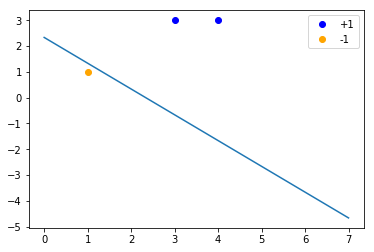

In [31]:
plot1(pla1)

In [28]:
pla2 = PLA(shuffle = True) # shuffle
pla2.fit(X, y)

finished at iters: 7, w: [0.3 0.3], b: -0.7


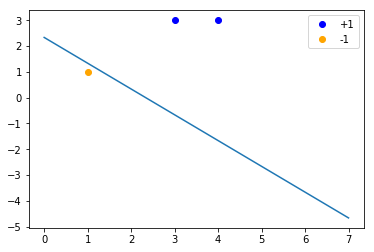

In [40]:
plot1(pla2)

In [29]:
pla0 = PLA_dual()
pla0.fit(X,y)

finished at iters: 5, w: [0.1 0.1], b: -0.30000000000000004


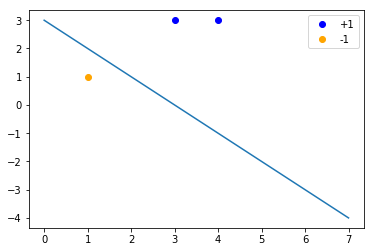

In [41]:
plot1(pla0)

In [33]:
# scikit-learn
pla3 = Perceptron()
pla3.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
pla3.coef_

array([[1., 0.]])

In [35]:
pla3.intercept_

array([-2.])

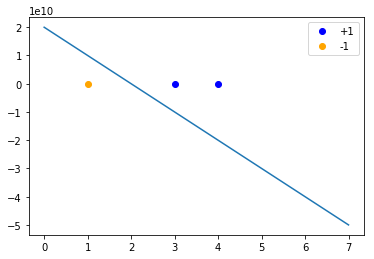

In [36]:
x_ponits = np.linspace(0, 7, 10)
y_ = -(pla3.coef_[0][0]*x_ponits + pla3.intercept_)/(pla3.coef_[0][1] + 1e-10)
plt.plot(x_ponits, y_)

plt.plot(mydata[:2, 0], mydata[:2, 1], 'bo', color='blue', label='+1')
plt.plot(mydata[2:, 0], mydata[2:, 1], 'bo', color='orange', label='-1')
plt.legend()

In [0]:
from time import time
lrs = np.arange(0.1, 1.0, 0.1)
t = []
for lr in lrs:
    start = time()
    pla = Perceptron(eta0 = lr)
    pla.fit(X, y)
    end = time()
    t.append(end - start)

In [38]:
t

[0.005453586578369141,
 0.004275083541870117,
 0.0010335445404052734,
 0.0007185935974121094,
 0.000614166259765625,
 0.000614166259765625,
 0.0004963874816894531,
 0.00043654441833496094,
 0.0004296302795410156]

Text(0.5, 1.0, 'time cost with different lr')

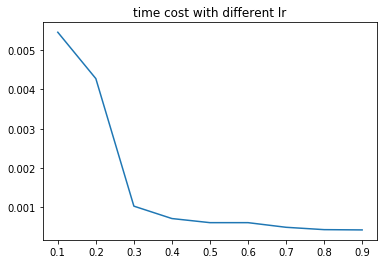

In [39]:
plt.figure()
plt.plot(lrs,t)
plt.title('time cost with different lr')